In [1]:
import pandas as pd
from training import DataPreprocessing
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import optuna

In [2]:
df = pd.read_parquet("..\\training_set.parquet")

In [3]:
training_set, test_set = DataPreprocessing.stratified_split_dataframe(df, "Label_Index")

X_train = training_set.drop("Label_Index", axis=1)  
y_train = training_set["Label_Index"]

X_test = test_set.drop("Label_Index", axis=1)
y_test = test_set["Label_Index"]

In [4]:
model = XGBClassifier(
    booster='gbtree',
    learning_rate=0.23962854155043442,
    n_estimators=211,
    max_depth=8,
    min_child_weight=7,
    subsample=0.6142975198934528,
    colsample_bytree=0.8348945145303123,
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8348945145303123, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.23962854155043442,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=211, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [5]:
y_pred = model.predict(X_test)

In [6]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      8562
         1.0       0.98      1.00      0.99      8540
         2.0       1.00      1.00      1.00      8532
         3.0       0.98      0.98      0.98      8523
         4.0       0.58      0.83      0.68      8518
         5.0       0.70      0.40      0.51      8514
         6.0       1.00      1.00      1.00      8386

    accuracy                           0.88     59575
   macro avg       0.89      0.88      0.88     59575
weighted avg       0.89      0.88      0.88     59575



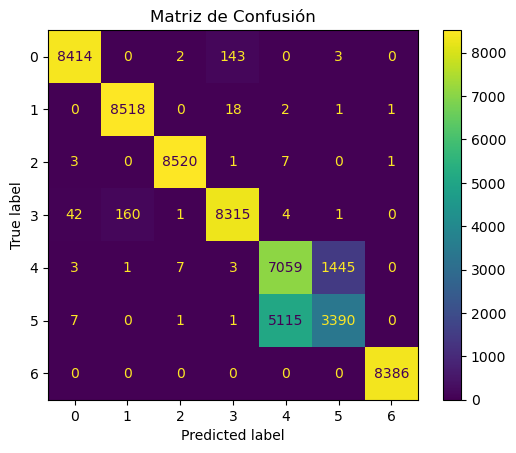

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.title('Matriz de Confusión')
plt.show()